In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\customer churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
# classifaction problem

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#class imbalance

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#no null values

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
#class imbalance

In [14]:
#data visulazation

<AxesSubplot:xlabel='gender', ylabel='count'>

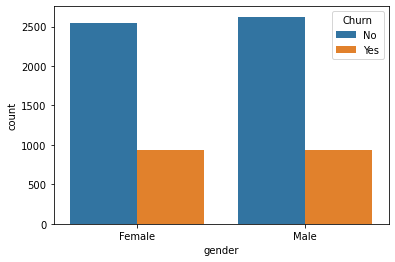

In [15]:
sns.countplot(df['gender'],hue='Churn',data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

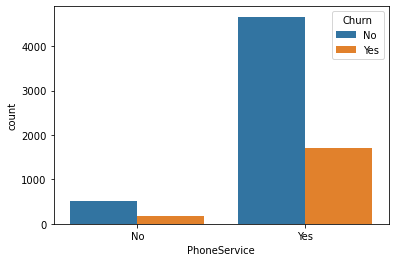

In [16]:
sns.countplot(df['PhoneService'],hue='Churn',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

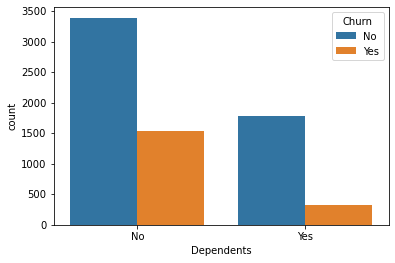

In [17]:
sns.countplot(df['Dependents'],hue='Churn',data=df)

<AxesSubplot:xlabel='Partner', ylabel='count'>

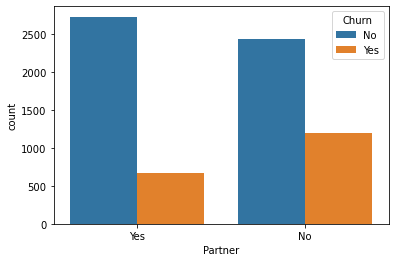

In [18]:
sns.countplot(df['Partner'],hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

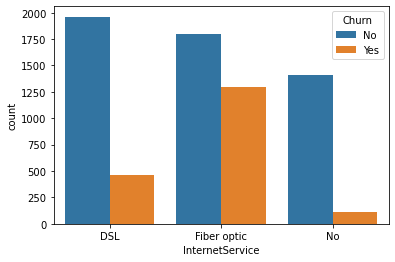

In [19]:
sns.countplot(df['InternetService'],hue='Churn',data=df)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

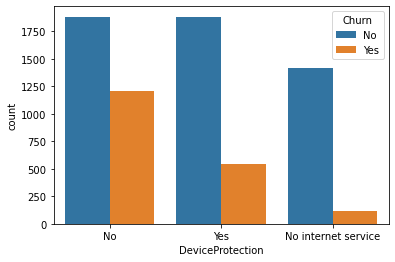

In [20]:
sns.countplot(df['DeviceProtection'],hue='Churn',data=df)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

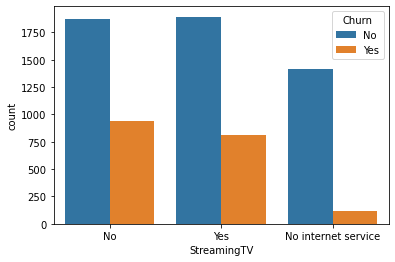

In [21]:
sns.countplot(df['StreamingTV'],hue='Churn',data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

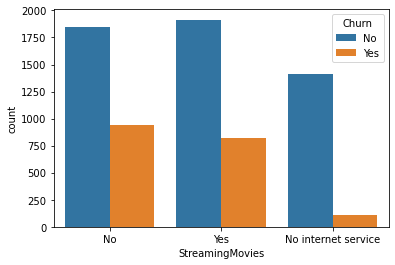

In [22]:
sns.countplot(df['StreamingMovies'],hue='Churn',data=df)

<AxesSubplot:xlabel='TotalCharges', ylabel='count'>

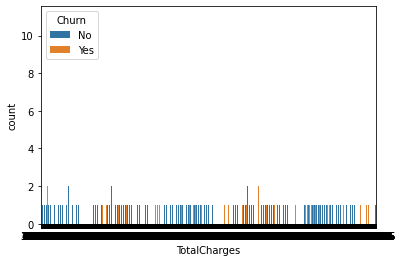

In [23]:
sns.countplot(df['TotalCharges'],hue='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

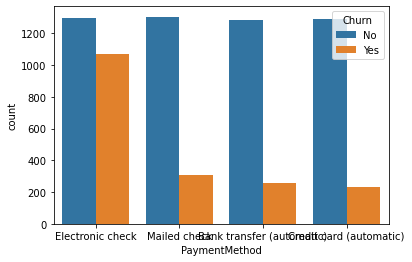

In [24]:
sns.countplot(df['PaymentMethod'],hue='Churn',data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

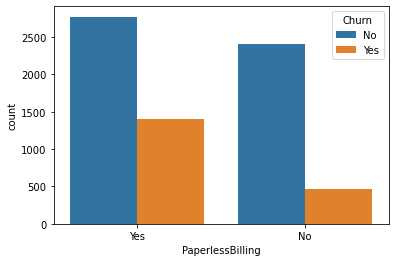

In [25]:
sns.countplot(df['PaperlessBilling'],hue='Churn',data=df)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

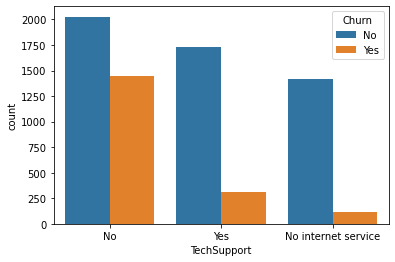

In [26]:
sns.countplot(df['TechSupport'],hue='Churn',data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

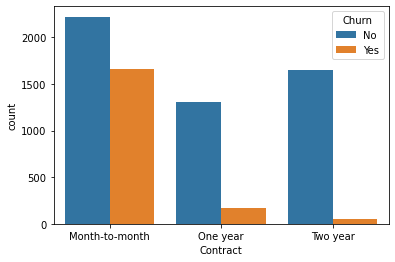

In [27]:
sns.countplot(df['Contract'],hue='Churn',data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

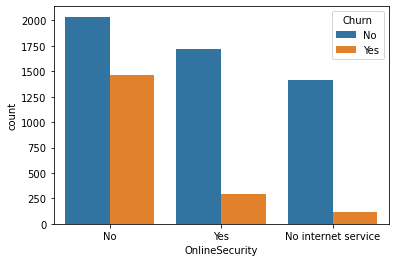

In [28]:
sns.countplot(df['OnlineSecurity'],hue='Churn',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

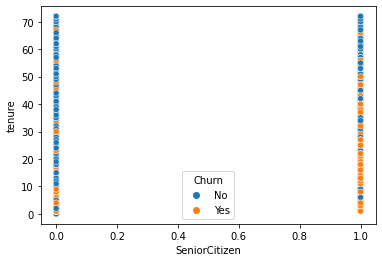

In [29]:
sns.scatterplot(data=df,x='SeniorCitizen',y='tenure',hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

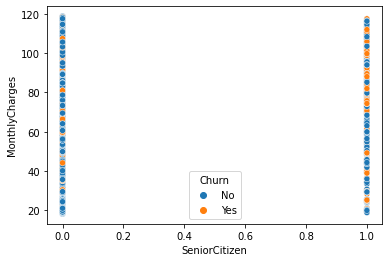

In [30]:
sns.scatterplot(data=df,x='SeniorCitizen',y='MonthlyCharges',hue='Churn')

In [31]:
#categorical data

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [34]:
df.dtypes

customerID          int32
gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
Churn               int32
dtype: object

In [35]:
#convert numerical

In [36]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


In [37]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [38]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [39]:
!pip install imbalanced-learn==0.6.0

In [40]:
!pip install scikit-learn==0.22.1

  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [41]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y)

In [42]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [43]:
#class balance 

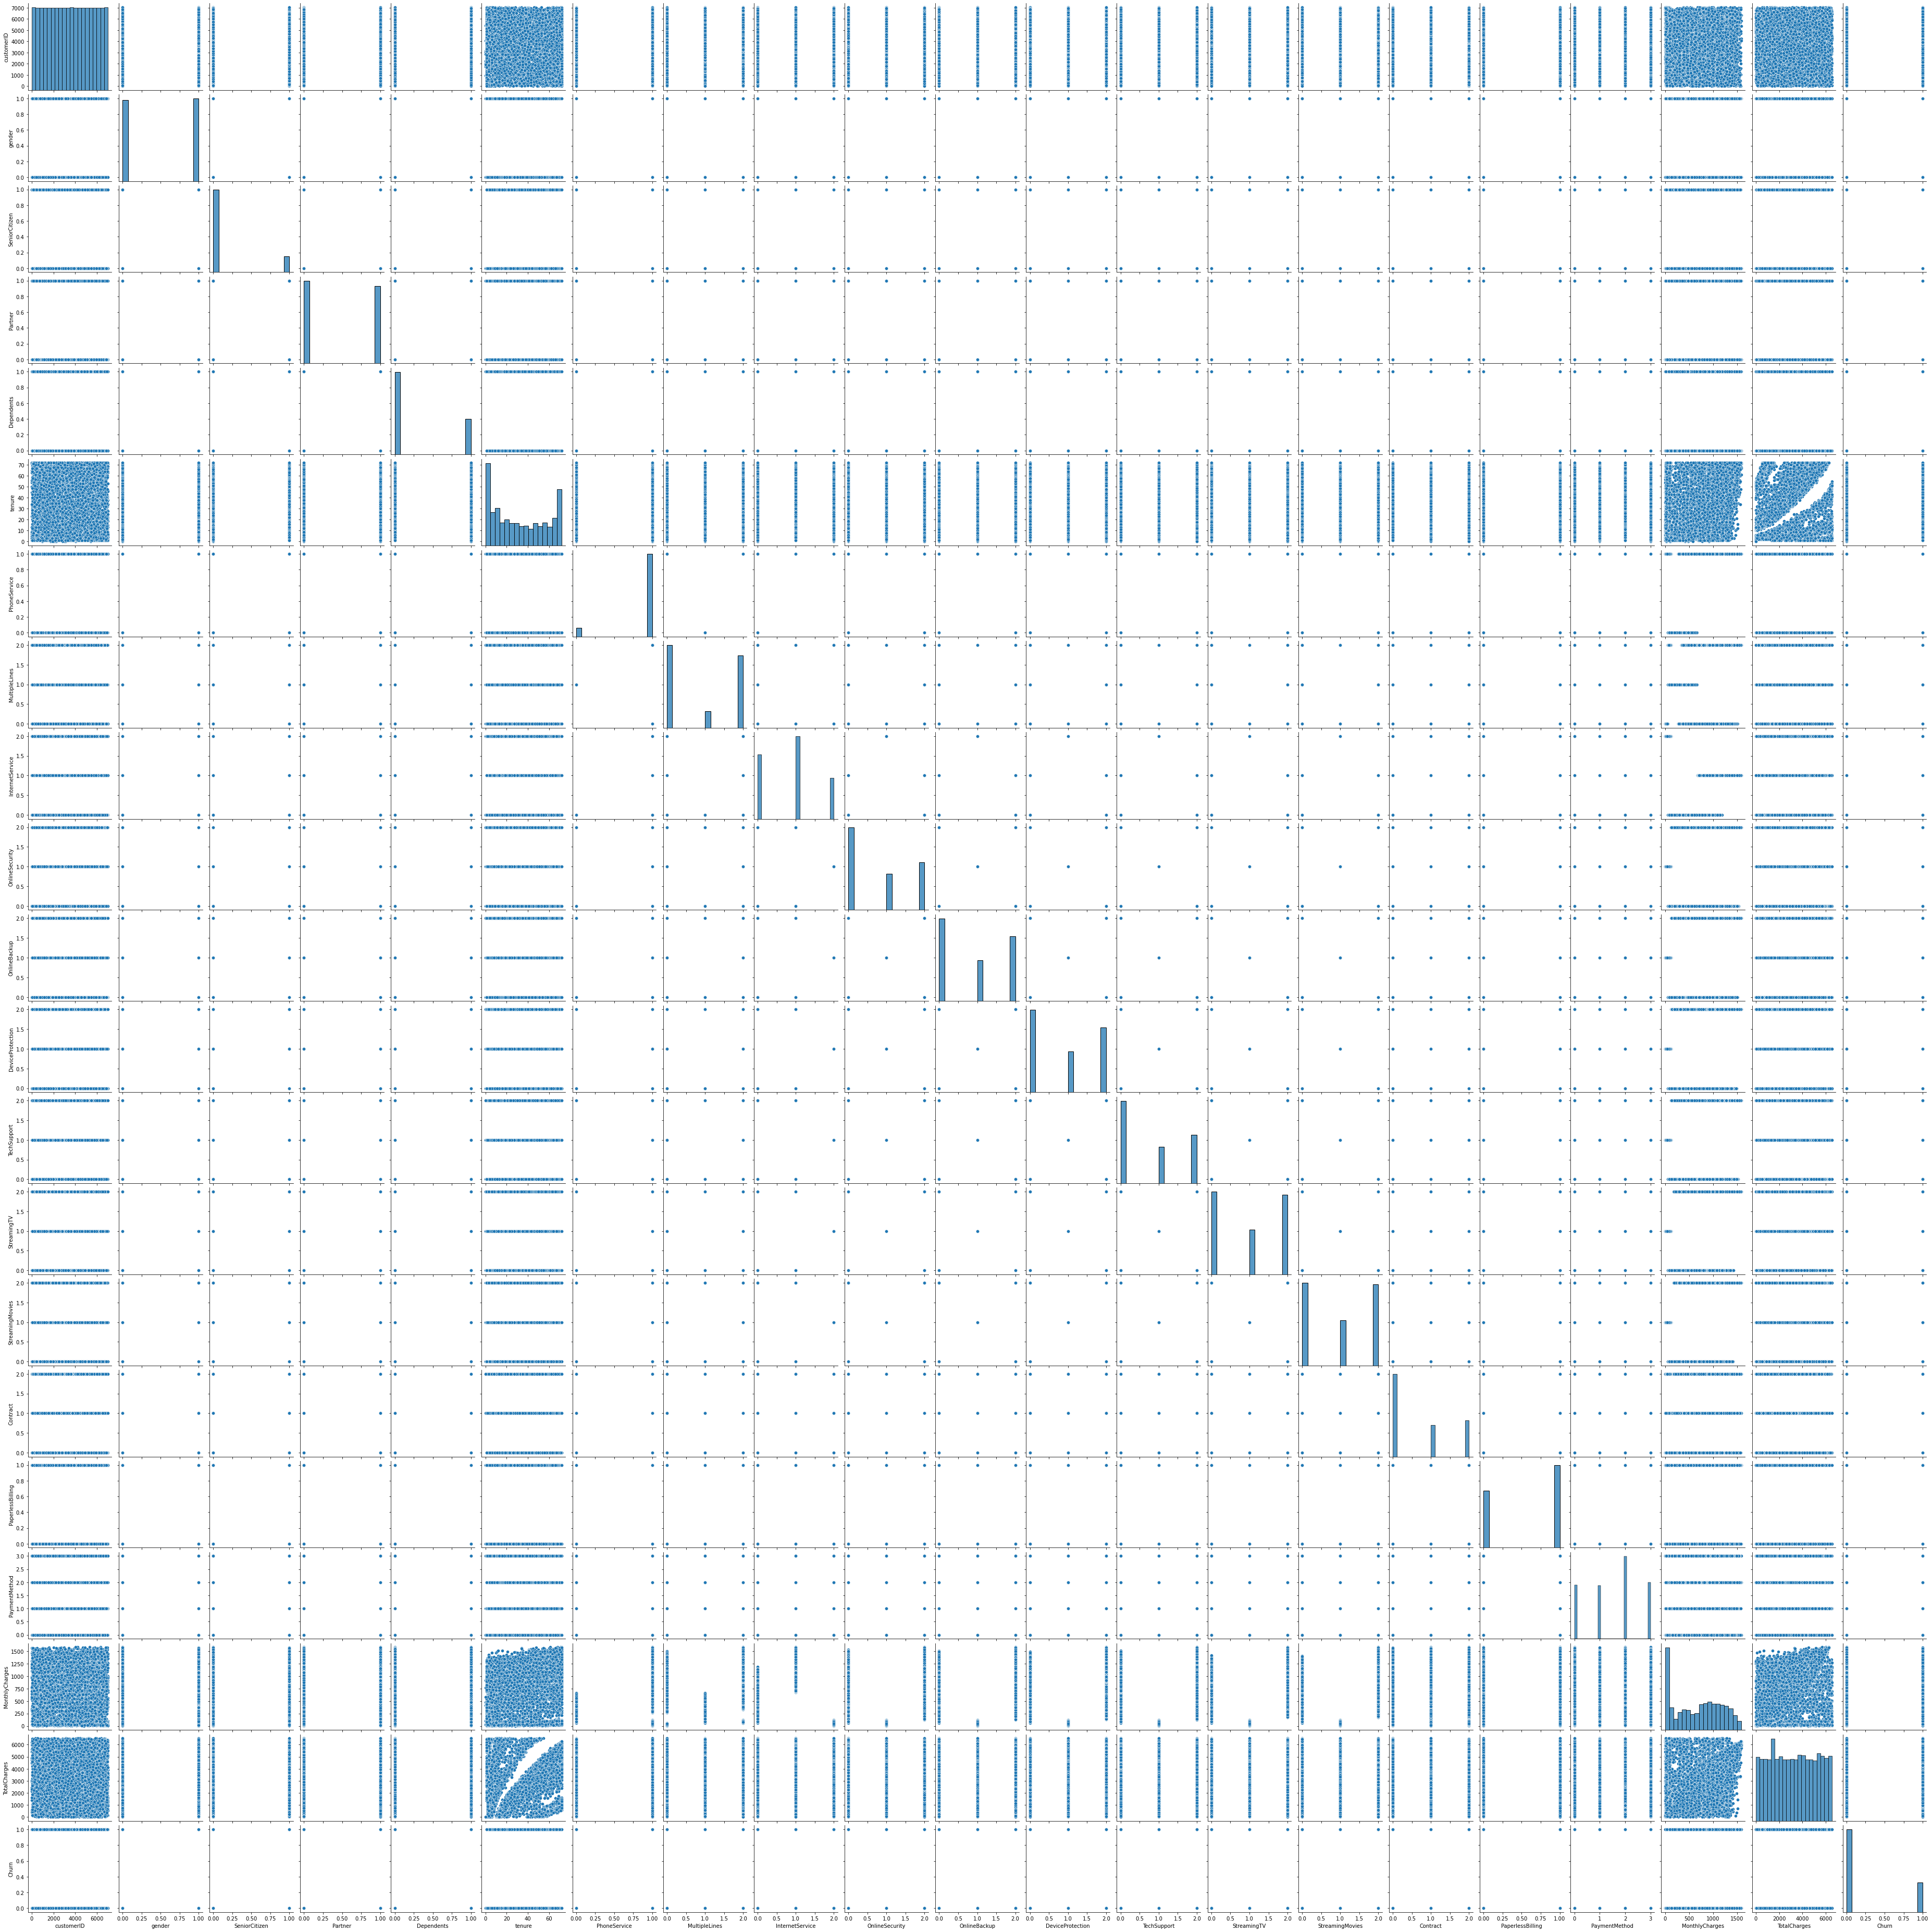

In [44]:
sns.pairplot(df)

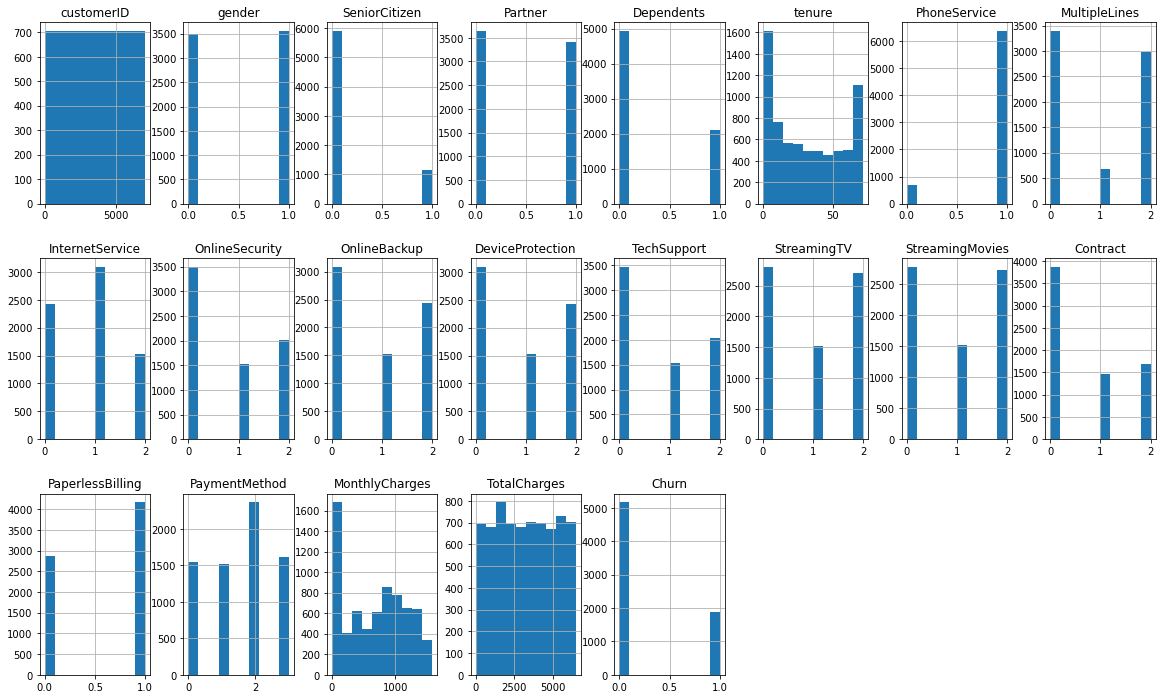

In [45]:
df.hist(figsize=(20,12),layout=(3,8),sharex=False);

In [46]:
corr = df.corr()
corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.006266,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309


In [47]:
corr_mat = df.corr()
corr_mat['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.183523
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

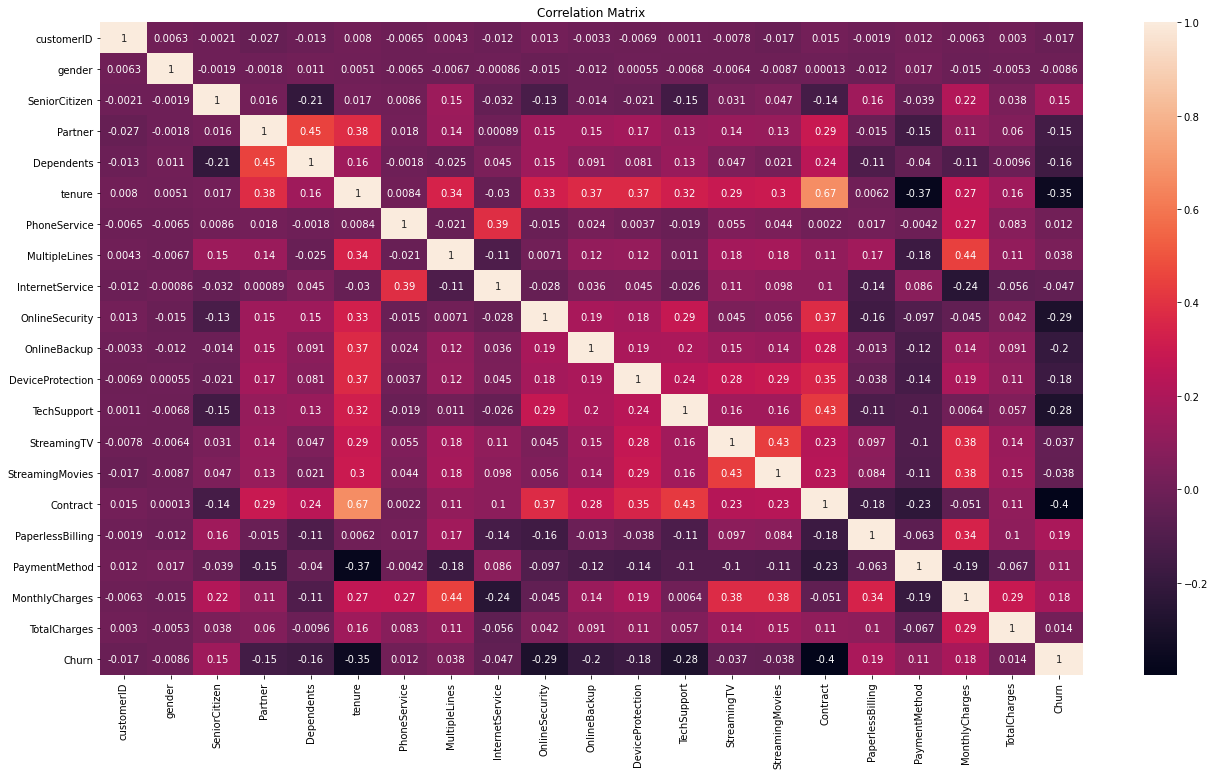

In [48]:
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

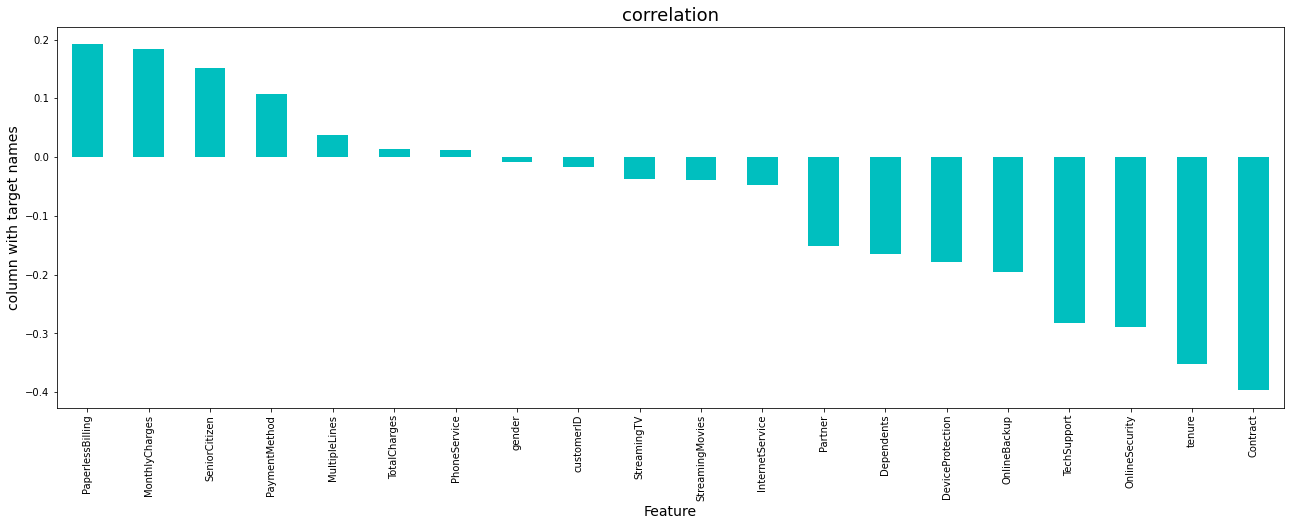

In [49]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

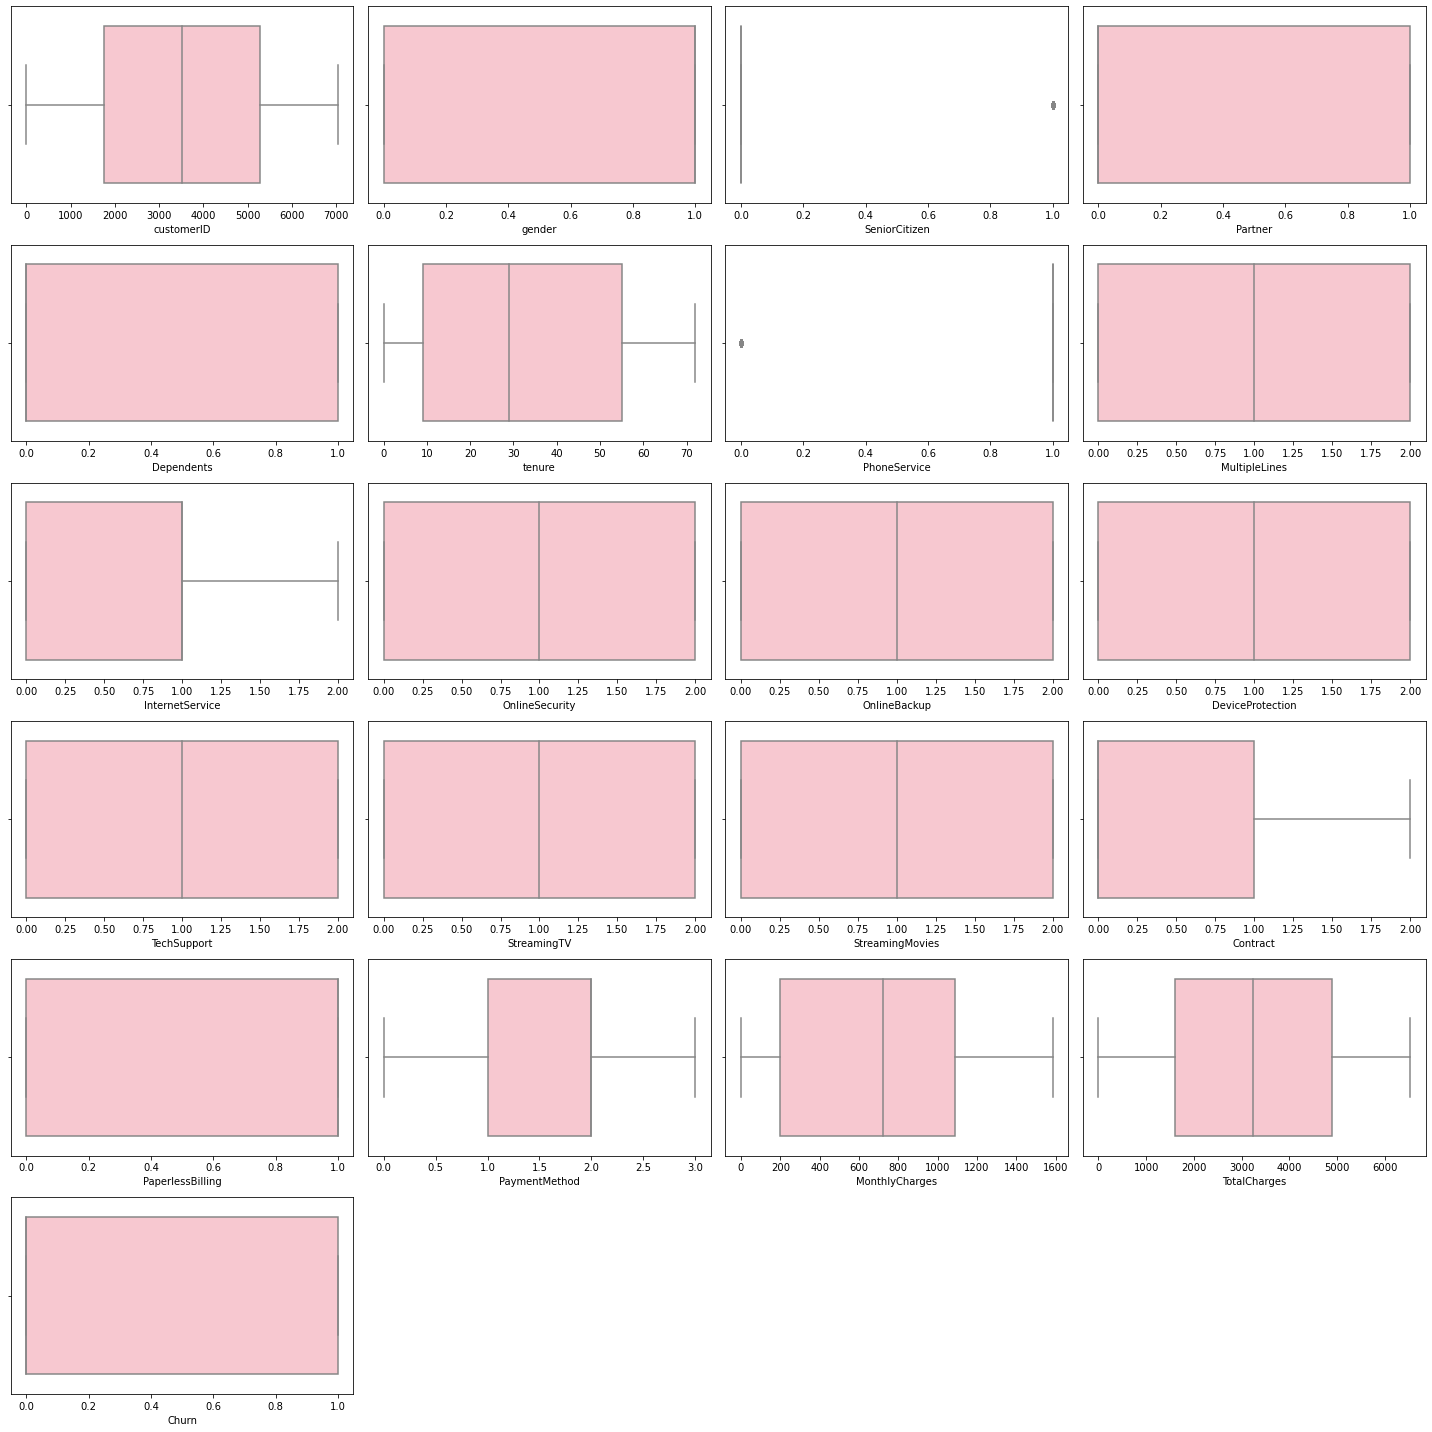

In [50]:
collist=df.columns.values
ncol=4
nrows=6
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='pink')
    plt.tight_layout()

In [51]:
# no outliers

In [52]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges      0.014263
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [53]:
#no skewness

In [54]:
# data cleaning complete

In [55]:
#model bulid ml

In [56]:
x = df.drop(columns=['Churn'],axis=1)
y = df['Churn']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.40,random_state=i)
    mod = RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8101490418736693 on Random_state 24


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.40,random_state=maxRS)

In [61]:
lr = LogisticRegression()
sv = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


In [62]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

accuracy_score 0.8197303051809794
confusion_matrix [[1914  199]
 [ 309  396]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2113
           1       0.67      0.56      0.61       705

    accuracy                           0.82      2818
   macro avg       0.76      0.73      0.75      2818
weighted avg       0.81      0.82      0.81      2818



In [63]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

accuracy_score 0.8140525195173882
confusion_matrix [[1935  178]
 [ 346  359]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.92      0.88      2113
           1       0.67      0.51      0.58       705

    accuracy                           0.81      2818
   macro avg       0.76      0.71      0.73      2818
weighted avg       0.80      0.81      0.81      2818



In [64]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.8073101490418737
confusion_matrix [[1927  186]
 [ 357  348]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.91      0.88      2113
           1       0.65      0.49      0.56       705

    accuracy                           0.81      2818
   macro avg       0.75      0.70      0.72      2818
weighted avg       0.80      0.81      0.80      2818



In [65]:
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.812278211497516
confusion_matrix [[1916  197]
 [ 332  373]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.91      0.88      2113
           1       0.65      0.53      0.59       705

    accuracy                           0.81      2818
   macro avg       0.75      0.72      0.73      2818
weighted avg       0.80      0.81      0.81      2818



In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8000849853216337


In [68]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.7346301575908123


In [69]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7962529840634881


In [70]:
print(cross_val_score(gb,x,y,cv=5).mean())

0.8010796059423189


In [72]:
#least score is random forest

In [73]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[3,6,9,12,15,18,20],
              'max_depth':[2,4,5,6,8,10,9],
              'min_samples_split':[3,11,15,16,19,20,21,28]}

gridsearch = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)
              

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 8, 10, 9],
                         'min_samples_split': [3, 11, 15, 16, 19, 20, 21, 28],
                         'n_estimators': [3, 6, 9, 12, 15, 18, 20]})

In [77]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 19,
 'n_estimators': 18}

In [78]:
mod = RandomForestClassifier(criterion='gini',max_depth=8,min_samples_split=19,n_estimators=18)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc*100)

81.47622427253371


In [79]:
#save the model

In [80]:
import joblib
joblib.dump(mod,'customer churn.pkl')

['customer churn.pkl']